In [1]:
%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader, Dataset
import torch

import sys
sys.path.append('../')
import os

from cont_speech_experiment import ContinuousSpeechExperiment, ClasswiseDataset
from nupic.research.support import parse_config
from cl_utils import train_model, unravel_index

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/home/ec2-user/nta/data/data_classes/"
test_dir = "/home/ec2-user/nta/data/"
config_file = "../experiments.cfg"
exp = "sparseCNN2"
config_init = parse_config(config_file)
config = config_init[exp]
config["name"] = exp
config["seed"] = np.random.randint(0,200)
config["data_dir"] = data_dir
config["batch_size"] = 32
config["num_classes"] = 11
config["freeze_params"] = "output"

# config["boost_strength"] = 0.0
# config["boost_strength_factor"] = 0.0

experiment = ContinuousSpeechExperiment(config=config)

model on GPU
Creating optimizer with learning rate= 0.01


In [3]:
model = experiment.model
f = experiment.combine_classes([2,4])

In [4]:
loader = experiment.train_loader

In [5]:
xs, ys = [], []
for x, y in loader:
    xs.append(x.cuda())
    ys.append(y.cuda())

In [6]:
f.close()

In [7]:
model(xs[0]).shape

torch.Size([32, 11])

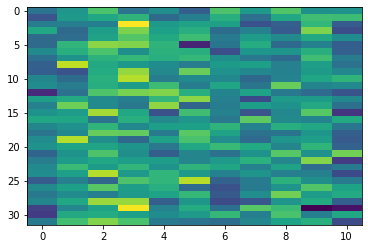

In [8]:
plt.imshow(model(xs[0]).detach().cpu().numpy(), aspect="auto")

In [15]:
train_model(model, loader, experiment.optimizer, experiment.device,
            batches_in_epoch=experiment.batches_in_epoch)

RuntimeError: leaf variable has been moved into the graph interior

In [11]:
weights = list(model.parameters())
n_weights = [k.detach().cpu().numpy() for k in weights]
# g_weights = [k.grad.detach().cpu().numpy() for k in weights]

In [151]:
idx[-1]

(34, 0, 4, 2)

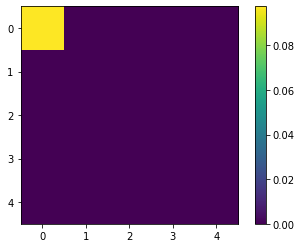

In [154]:
plt.imshow(n_weights[0][34,0,:,:])
plt.colorbar()

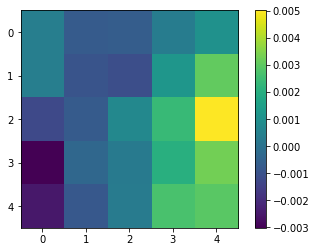

In [121]:
plt.imshow(g_weights[0][3,0,:,:])
plt.colorbar()

In [12]:
def unravel_index(index, shape):
    res = []
    for size in shape[::-1]:
        res.append(int(index % size))
        index = int(index // size)
    return tuple(res[::-1])

In [13]:
s, inds = torch.sort(weights[0].flatten())

k= 32 # top k
idx = [unravel_index(ind, weights[0].shape) for ind in inds[:-k]]

In [ ]:
[weights[0][i] for i in idx]

In [14]:
for i in idx:
    weights[0][i] = torch.tensor(0., device=experiment.device, requires_grad=False)

In [169]:
experiment.device

device(type='cuda')

In [175]:
ws[0][idx[-1]]

tensor(0., device='cuda:0', grad_fn=<SelectBackward>)

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[[[ 0.0000, -0.1725, -0.0296,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000,  0.0000, -0.1290],
           [-0.0472,  0.0000,  0.0212,  0.1573, -0.1935],
           [-0.1372, -0.0299,  0.0000, -0.0800,  0.0376],
           [ 0.0000,  0.0000, -0.1030,  0.0000, -0.1808]]],
 
 
         [[[ 0.0000,  0.0000,  0.0000,  0.1727,  0.0507],
           [ 0.0000,  0.0000,  0.1284,  0.1994, -0.1101],
           [ 0.0000,  0.0000,  0.0646, -0.1802,  0.1394],
           [ 0.0000, -0.1607,  0.0000,  0.1423,  0.0000],
           [-0.0764,  0.0000, -0.0272,  0.0000,  0.1018]]],
 
 
         [[[ 0.0138,  0.0000,  0.0100,  0.0000,  0.0000],
           [ 0.0369,  0.0000,  0.0000,  0.0975,  0.0000],
           [ 0.0051,  0.0000, -0.0517,  0.1249, -0.0760],
           [ 0.0000,  0.0518,  0.0844, -0.1592,  0.0000],
           [ 0.1600,  0.0000,  0.0000,  0.0000, -0.0717]]],
 
 
         ...,
 
 
         [[[-0.0933,  0.0000,  0.0000,  0.1173, -0.0870],
           [ 